In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
from tensorflow import keras
import numpy as np

from matplotlib import pyplot as plt
from math import floor

trim = 60000
train_images = np.load('GradientCircles__DiffLetters_60000_28x28.npy')
train_images = train_images/255
train_labels = np.load('GradientCircles_60000_28x28.npy')
train_labels = train_labels.reshape(60000,28*28)/255
train_labels = train_labels[:trim,:]





/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

In [2]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(235, activation='relu'),
    keras.layers.Dense(235, activation='sigmoid'),
    keras.layers.Dense(28*28, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
model.fit(train_images, train_labels, epochs=5)

test_images = np.load('GradientCircles__DiffLetters_6000_28x28.npy')
test_labels = np.load('GradientCircles_6000_28x28.npy')
#test_labels_formated = test_labels.reshape(6000,28*28)/255
predictions = model.predict(test_images)


Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 73s 1ms/step - loss: 0.0436 - acc: 0.5234

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 75s 1ms/step - loss: 0.0206 - acc: 0.4877

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 83s 1ms/step - loss: 0.0121 - acc: 0.4341

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 89s 1ms/step - loss: 0.0085 - acc: 0.4250

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 92s 2ms/step - loss: 0.0079 - acc: 0.4250



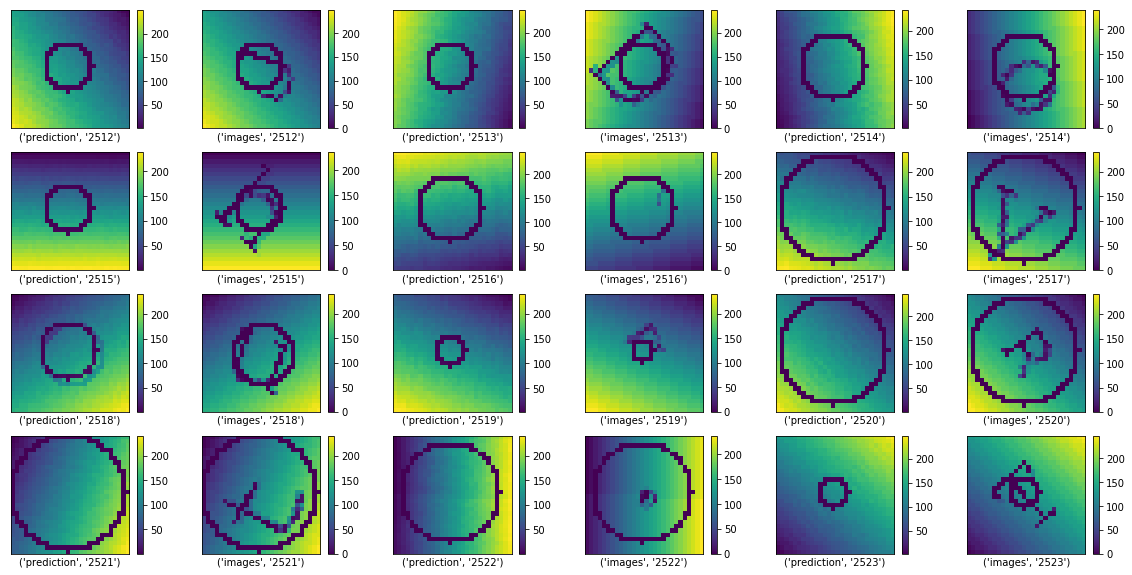

In [12]:
num_imx,num_imy  = 6,4
num_im = num_imx*num_imy

plt.figure(figsize=(20,10))
for i in range(num_im):
    plt.subplot(num_imy,num_imx,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ind = 2512+floor(i/2)
    if i%2 == 0:
        im = predictions[ind].reshape(28,28)*255
        label = 'prediction',str(ind)
    else:
        #im = test_labels[ind]
        #label = 'ref',str(ind)
        im = test_images[ind]
        label = 'images',str(ind)
    plt.imshow(im)
    plt.xlabel(label)
    plt.colorbar()
plt.show()


In [11]:
model.save('my_model.h5')